In [1]:
import geopandas as gpd
import math
import numpy as np

In [16]:
fname = "pluto.geojson"
gdf = gpd.read_file(fname)


In [4]:
#show type of object
#sample means random
print(type(gdf))
print(gdf.sample(n=5).sort_values('bbl').sort_index())

<class 'geopandas.geodataframe.GeoDataFrame'>
                     address         bbl  \
587              73 1 AVENUE  1004460033   
1444            592 BROADWAY  1005110012   
1563       463 WEST BROADWAY  1005150007   
2397       28 EAST 14 STREET  1005710017   
2467  19 EAST HOUSTON STREET  1005110019   

                                               geometry  
587   MULTIPOLYGON (((-73.98699 40.72555, -73.98703 ...  
1444  MULTIPOLYGON (((-73.99632 40.72473, -73.99650 ...  
1563  MULTIPOLYGON (((-73.99995 40.72619, -74.00000 ...  
2397  MULTIPOLYGON (((-73.99228 40.73529, -73.99246 ...  
2467  MULTIPOLYGON (((-73.99616 40.72492, -73.99647 ...  


In [5]:
#three ways of accessing/selecting a column
#iloc to get 2 columns (address and geometry)
print(type(gdf.geometry), type(gdf['geometry']), type(gdf.iloc[:,2]))


<class 'geopandas.geoseries.GeoSeries'> <class 'geopandas.geoseries.GeoSeries'> <class 'geopandas.geoseries.GeoSeries'>


In [9]:
print(gdf.head(5).iloc[:,2])

0    MULTIPOLYGON (((-73.98834 40.72313, -73.98740 ...
1    MULTIPOLYGON (((-73.99119 40.73348, -73.99123 ...
2    MULTIPOLYGON (((-73.99686 40.72377, -73.99696 ...
3    MULTIPOLYGON (((-73.98831 40.72532, -73.98848 ...
4    MULTIPOLYGON (((-73.99515 40.72575, -73.99507 ...
Name: geometry, dtype: geometry


In [8]:
#look at the chaining and how to select columns
(gdf.sample(5).reset_index().iloc[:,:])

,index,address,bbl,geometry
0,2595,199 1 AVENUE,1004540044,"MULTIPOLYGON (((-73.98356 40.73026, -73.98360 ..."
1,2361,64 2 AVENUE,1004450006,"MULTIPOLYGON (((-73.98917 40.72579, -73.98920 ..."
2,1622,225 EAST 14 STREET,1008960012,"MULTIPOLYGON (((-73.98591 40.73324, -73.98584 ..."
3,2810,409 EAST 6 STREET,1004340053,"MULTIPOLYGON (((-73.98537 40.72645, -73.98535 ..."
4,92,431 EAST 6 STREET,1004340042,"MULTIPOLYGON (((-73.98458 40.72611, -73.98475 ..."


In [12]:
print(type(gdf.shape),type(len(gdf)));
print("Dimension: {}, Row {}\n".format(list(gdf.shape),len(gdf)));

<class 'tuple'> <class 'int'>
Dimension: [2861, 3], Row 2861



In [13]:
print(type(gdf.columns))
print(gdf.columns)

<class 'pandas.core.indexes.base.Index'>
Index(['address', 'bbl', 'geometry'], dtype='object')


In [14]:
print(type(gdf.index))
print(list(gdf.head(10).index))

<class 'pandas.core.indexes.range.RangeIndex'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


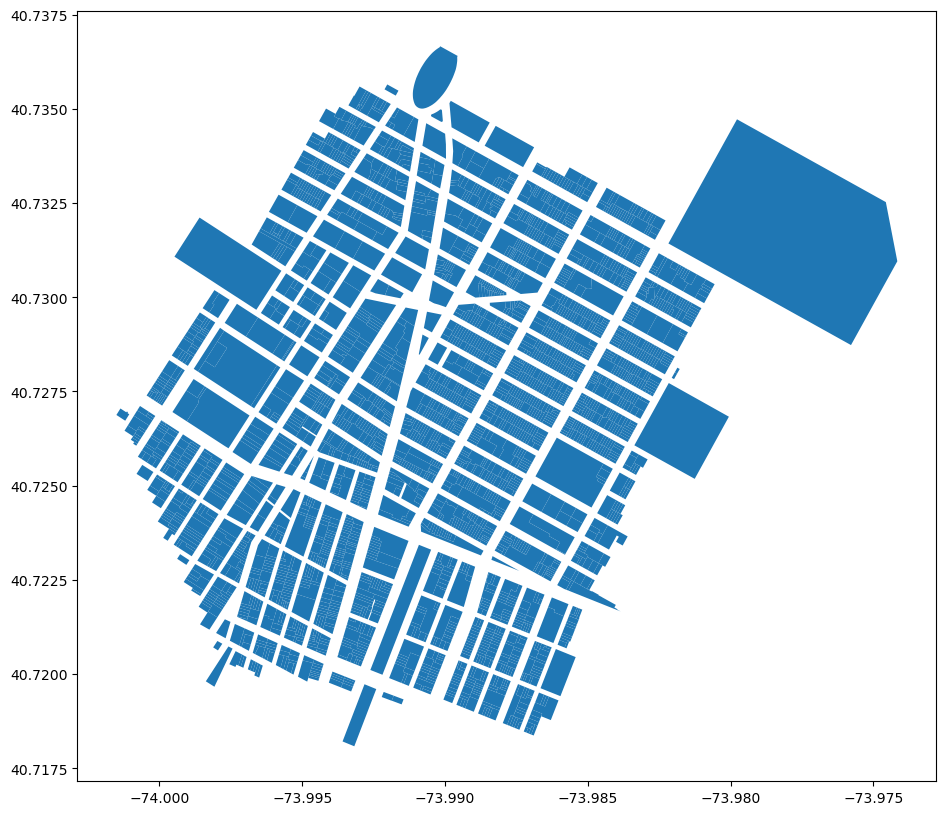

In [17]:
series_gdf = gpd.GeoSeries(gdf["geometry"])
ax = series_gdf.plot(figsize=(20,10))
series_gdf.explore()

MULTIPOLYGON (((987483.3059840449 202733.0663837463, 987743.3265345023 202589.92054582044, 987472.500563425 202697.36043659176, 987483.3059840449 202733.0663837463)))


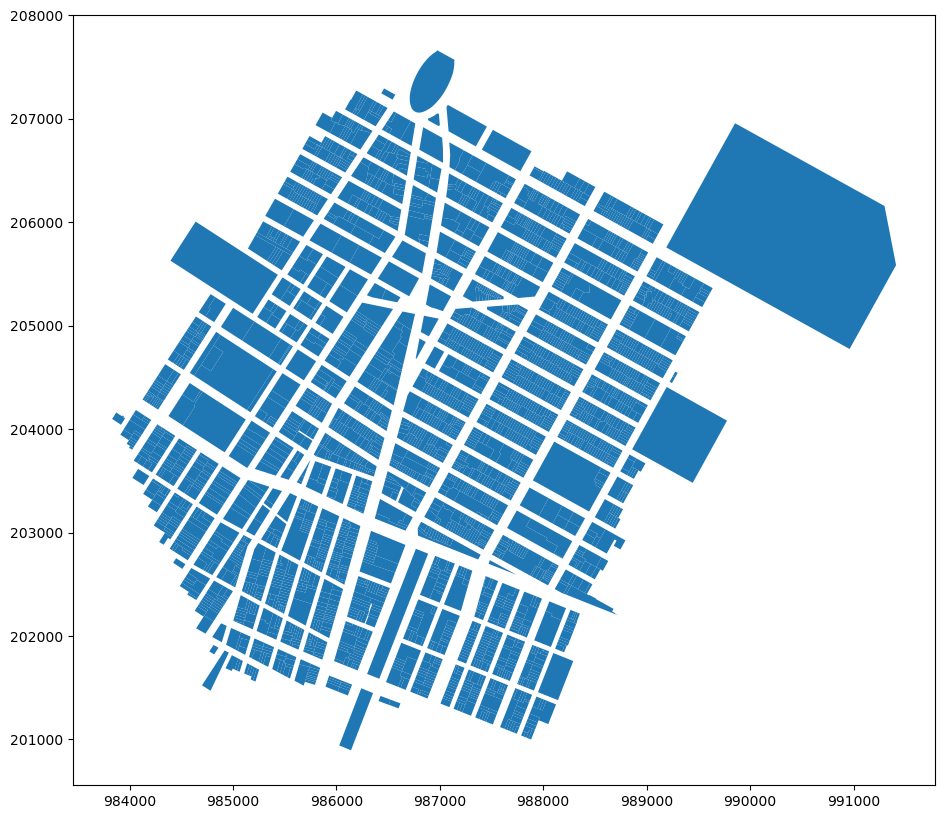

In [18]:
gdf_sp  = gdf.to_crs('epsg:2263') # Long Island State Plane
print(gdf_sp['geometry'][0])
series_sp = gpd.GeoSeries(gdf_sp['geometry'])
#print(series_WB.bounds)
ax = series_sp.plot(figsize=(20,10))

In [19]:
#creating a multilayer webmap
mobj = gdf.head(20).explore()
gdf.tail(20).explore(m=mobj, style_kwds = {'color':'red'})

In [ ]:
#projections